In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

import seaborn as sns

In [9]:
RANDOM_STATE = 42

In [2]:
df = pd.read_csv('../Dataset/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

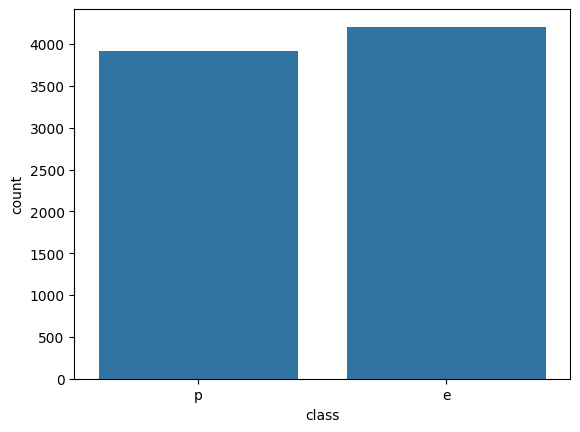

In [7]:
sns.countplot(x='class', data=df)
plt.show()

In [13]:
df['label'] = df['class'].apply(lambda x: 1 if x == 'e' else 0)

In [14]:
X = df.drop(['class', 'label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [16]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train label distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test label distribution:\n{y_test.value_counts(normalize=True)}")

Train shape: (6499, 22), Test shape: (1625, 22)
Train label distribution:
label
1    0.517772
0    0.482228
Name: proportion, dtype: float64
Test label distribution:
label
1    0.518769
0    0.481231
Name: proportion, dtype: float64


In [15]:
# one-hot encode all categorical features in Pipeline
categorical_features = X.columns.tolist()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [17]:
model_alpha1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BernoulliNB(alpha=1.0))
])

model_alpha1.fit(X_train, y_train)
y_pred_alpha1 = model_alpha1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred_alpha1)
print(f"Accuracy with alpha=1.0: {acc1:.4f}")
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_alpha1))
print('\n')
print("Classification Report:")
print(classification_report(y_test, y_pred_alpha1))

Accuracy with alpha=1.0: 0.9360


Confusion Matrix:
[[694  88]
 [ 16 827]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       782
           1       0.90      0.98      0.94       843

    accuracy                           0.94      1625
   macro avg       0.94      0.93      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [18]:
model_alpha2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BernoulliNB(alpha=2))
])

model_alpha2.fit(X_train, y_train)
y_pred_alpha2 = model_alpha2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred_alpha2)
print(f"Accuracy with alpha=2.0: {acc2:.4f}")
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_alpha2))
print('\n')
print("Classification Report:")
print(classification_report(y_test, y_pred_alpha2))

Accuracy with alpha=2.0: 0.9329


Confusion Matrix:
[[691  91]
 [ 18 825]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       782
           1       0.90      0.98      0.94       843

    accuracy                           0.93      1625
   macro avg       0.94      0.93      0.93      1625
weighted avg       0.94      0.93      0.93      1625



In [19]:
print(f"\nAccuracy change (alpha=2 - alpha=1): {acc2 - acc1:.4f}")


Accuracy change (alpha=2 - alpha=1): -0.0031


The Bernoulli Naive Bayes model did a great job distinguishing between edible and poisonous mushrooms. With an alpha value of 1.0, it reached an accuracy of about 93.6%, correctly classifying most samples in both categories. The confusion matrix shows that only a small number of edible mushrooms were mistaken for poisonous ones and vice versa, meaning the model is both accurate and reliable overall.

When alpha was increased to 2.0, the accuracy dropped slightly to 93.3%, a very small difference. This means adding more smoothing didn’t change the model’s performance much, though it made the model a bit less sensitive to specific feature patterns. Overall, both models performed strongly and show that the Naive Bayes approach is well-suited for this mushroom dataset.

In [26]:
feature_names = model_alpha1.named_steps['preprocessor'].get_feature_names_out()
log_prob = model_alpha1.named_steps['classifier'].feature_log_prob_

llr = log_prob[1] - log_prob[0]

feature_llr = pd.Series(llr, index=feature_names).sort_values(ascending=False)
print("Top 5 features indicative of edible mushrooms:")
print(feature_llr.head(5))
print("\nTop 5 features indicative of poisonous mushrooms:")
print(feature_llr.tail(5))


Top 5 features indicative of edible mushrooms:
cat__stalk-color-above-ring_g    6.068811
cat__stalk-color-below-ring_g    6.066653
cat__population_n                5.709669
cat__odor_a                      5.700367
cat__population_a                5.659026
dtype: float64

Top 5 features indicative of poisonous mushrooms:
cat__odor_y         -6.189171
cat__odor_s         -6.228053
cat__ring-type_l    -7.007417
cat__gill-color_b   -7.314587
cat__odor_f         -7.527529
dtype: float64


The most distinctive features for edible mushrooms were related to stalk color (both above and below the ring being green), population type, and a mild almond-like odor. In contrast, the strongest indicators of poisonous mushrooms were strong odors like fishy, spicy, or musty, along with specific traits such as ring type and dark gill color. Overall, odor and stalk color appear to be the most influential characteristics in distinguishing edible from poisonous mushrooms.